In [ ]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
# Чтение загруженного CSV файла
df = pd.read_csv('sample_data/train.csv', encoding='utf-8')
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [ ]:
# Получаем список всех столбцов в данных
print("Столбцы данных:", df.columns)

Столбцы данных: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [ ]:
# Получаем размеры данных (количество строк и столбцов)
print("Размеры данных:", df.shape)

Размеры данных: (891, 12)


In [ ]:
# Выводим статистическое описание данных, включая среднее значение, стандартное отклонение и т.д.
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [ ]:
# Проверка на наличие пропусков
print("Проверка на наличие пропусков:")
print(df.isnull().sum())

Проверка на наличие пропусков:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
# Удаление строк с пропущенными значениями
df.dropna(subset=['Age', 'Cabin'], inplace=True)

In [ ]:
# Проверка на наличие пропусков и удаление дубликатов
# df.fillna(df.mean(), inplace=True)
duplicate_count = df.duplicated().sum()
if duplicate_count > 0:
    df = df.drop_duplicates()

In [ ]:
# Вывод всех столбцов DataFrame
print("Столбцы данных:", df.columns.tolist())


Столбцы данных: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [ ]:
# Определяем числовые и категориальные признаки
numeric_features = ['PassengerId', 'Survived', 'Age', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin']

In [ ]:
# Создаем трансформер для числовых признаков
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [ ]:
# Создаем трансформер для категориальных признаков
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
# Объединяем трансформеры
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
# Применяем трансформеры к данным
X_processed = preprocessor.fit_transform(df)

# Теперь X_processed содержит нормализованные числовые данные и закодированные категориальные данные

In [ ]:
# Определение признаков (X) и целевой переменной (y)
X = X_processed
y = df['Survived']  # Используем 'Survived' как целевую переменную

In [ ]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Создание модели
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Используем 'sigmoid' для бинарной классификации
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Компиляция модели
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Обучение модели
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 149ms/step - accuracy: 0.4594 - loss: 0.7049 - val_accuracy: 0.8000 - val_loss: 0.6574
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.7853 - loss: 0.6217 - val_accuracy: 0.8000 - val_loss: 0.5885
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.8421 - loss: 0.5541 - val_accuracy: 0.8000 - val_loss: 0.5276
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.8684 - loss: 0.4931 - val_accuracy: 0.8000 - val_loss: 0.4687
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.9802 - loss: 0.4147 - val_accuracy: 0.9000 - val_loss: 0.4088
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9742 - loss: 0.3472 - val_accuracy: 0.9333 - val_loss: 0.3491
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9852 - loss: 0.2942 - val_accuracy: 1.0000 - val_loss: 0.2905
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9966 - loss: 0.2239 - val_accuracy: 1.0000 - val_loss: 0.2363

In [ ]:
# Прогнозирование
y_pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


In [ ]:
# Оценка модели
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [ ]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE): 0.00042391836177557707
Root Mean Squared Error (RMSE): 0.020589277835212607


In [ ]:
# Пояснения к результатам
print("\nПояснения к результатам:")
print("MSE (Mean Squared Error) показывает среднюю квадратичную ошибку.")
print("RMSE (Root Mean Squared Error) дает представление о размере ошибки в тех же единицах, что и целевая переменная.")


Пояснения к результатам:
MSE (Mean Squared Error) показывает среднюю квадратичную ошибку.
RMSE (Root Mean Squared Error) дает представление о размере ошибки в тех же единицах, что и целевая переменная.


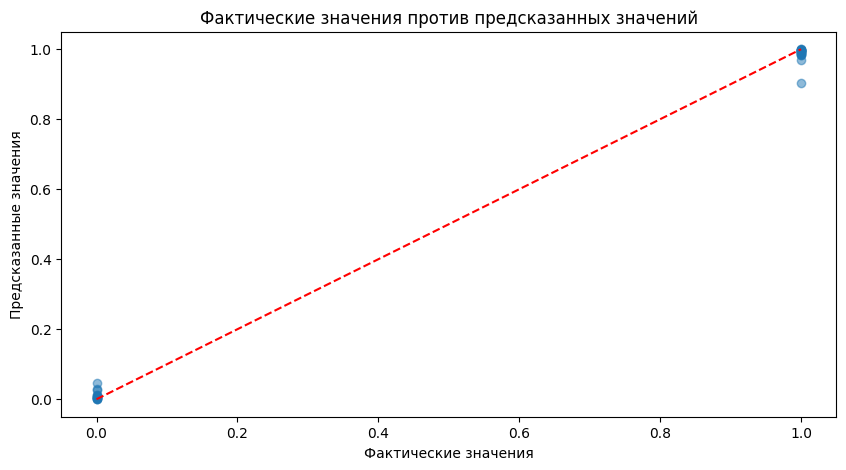

In [ ]:
# Визуализация прогнозов
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Фактические значения против предсказанных значений')
plt.show()

In [ ]:
# Создание DataFrame для фактических и предсказанных значений
results_df = pd.DataFrame({
    'Фактические значения': y_test,
    'Предсказанные значения': y_pred.flatten()  # Используем flatten(), чтобы получить одномерный массив
})
# Выводим первые несколько строк результирующего DataFrame
print(results_df.head())
# Дополнительно можно сохранить результаты в CSV файл, если это необходимо
results_df.to_csv('predictions.csv', index=False, encoding='utf-8')

     Фактические значения  Предсказанные значения
110                     0                0.002058
248                     1                0.982784
742                     1                0.996022
540                     1                0.991988
712                     1                0.983460


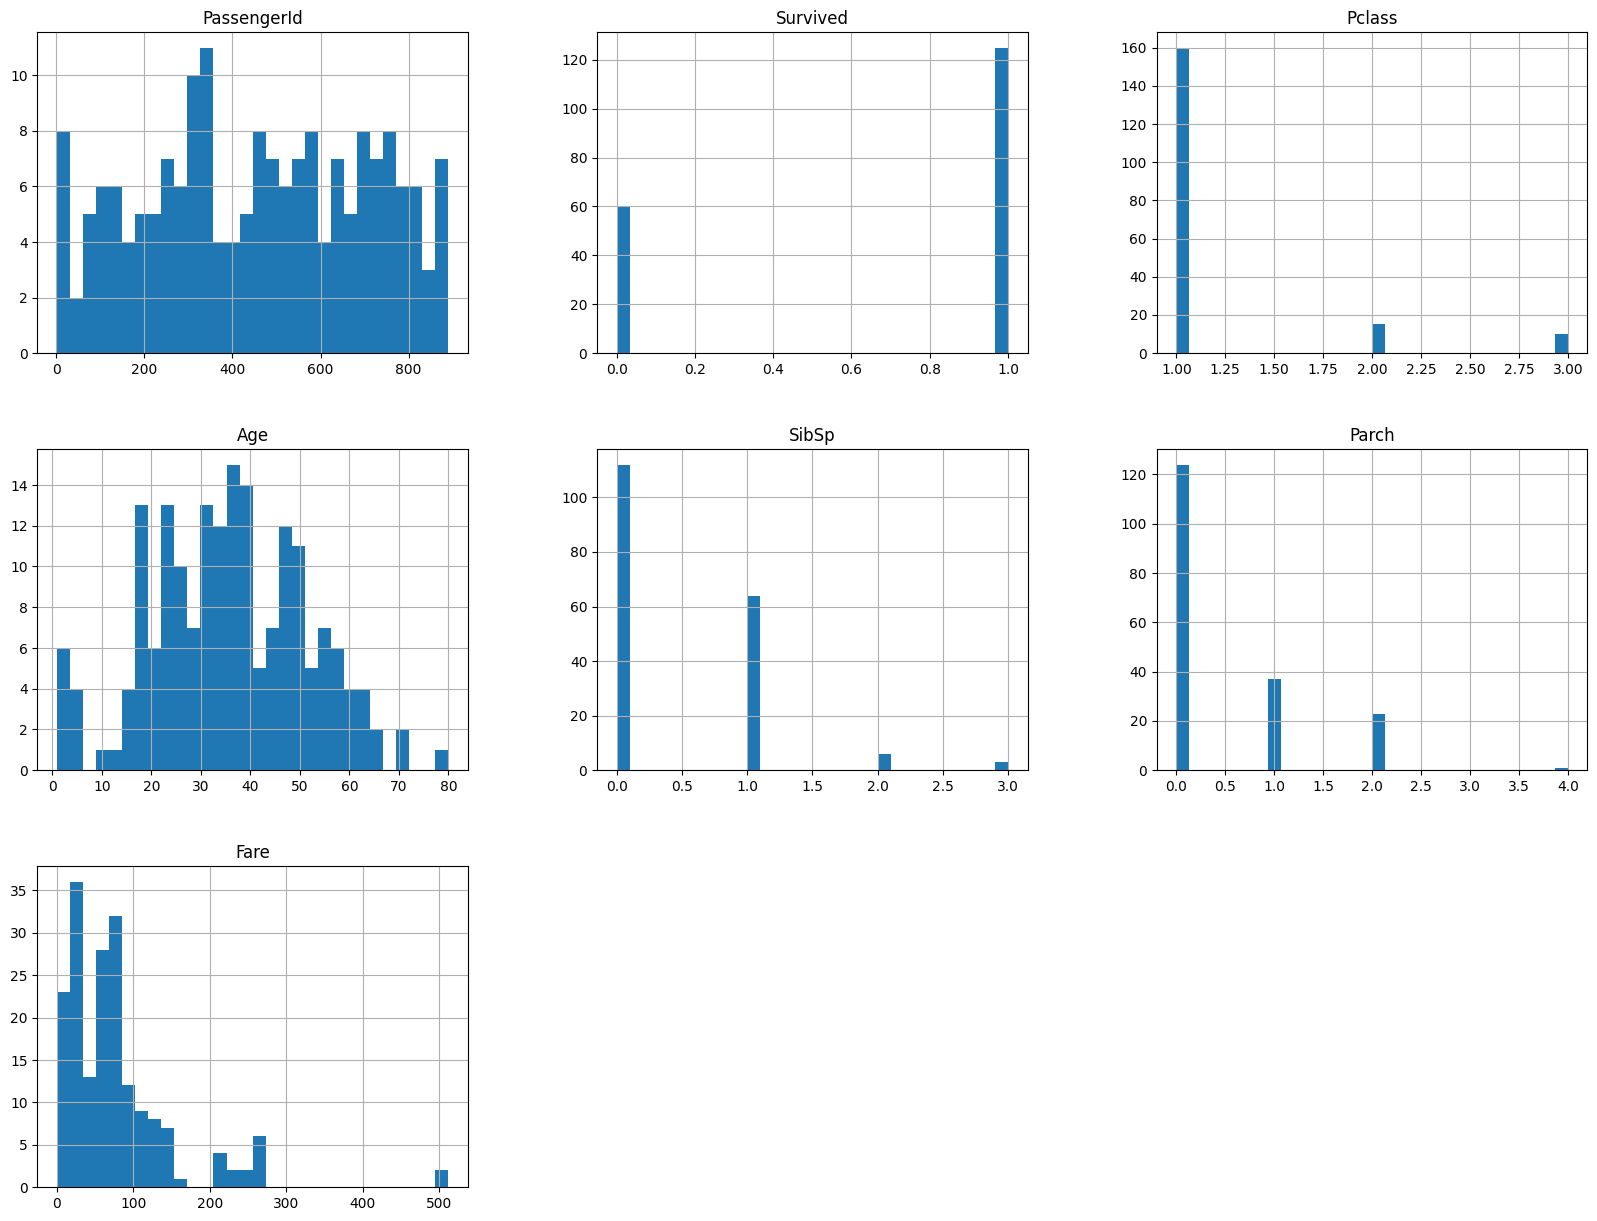

In [ ]:
# Визуализация данных
# Гистограммы для числовых данных
df.select_dtypes(include=['number']).hist(bins=30, figsize=(20, 15))
plt.show()